AttributeError: ignored

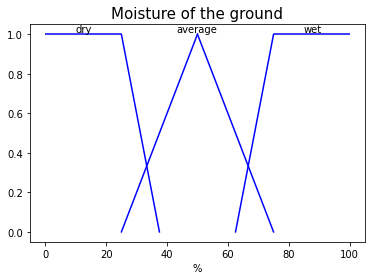

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 소속함수 표현 이미지
# 입력 1 : 땅의 수분기 (%)
# dry 함수
plt.hlines(1,0,25,'b')
x1=np.linspace(25,37.5,30)
fx1=-0.08*x1+3
plt.plot(x1,fx1,'b')
plt.text(10,1.01,'dry')

# average 함수
x2=np.linspace(25,50,30)
fx2=0.04*x2-1
plt.plot(x2,fx2,'b')

x3=np.linspace(50,75,30)
fx3=-0.04*x3+3
plt.plot(x3,fx3,'b')
plt.text(43,1.01,'average')

# wet 함수
x4=np.linspace(62.5,75,30)
fx4=0.08*x4-5
plt.plot(x4,fx4,'b')
plt.hlines(1,75,100,'b')
plt.text(85,1.01,'wet')

plt.title('Moisture of the ground', size=15)
plt.xlabel('%',loc='right')

plt.show()


# 입력 2 : 화씨 온도 (°F)
# cold 함수
x1=np.linspace(0,50,50)
fx1=-(1/50)*x1+1
plt.plot(x1,fx1,'b')
plt.text(1,1.01,'cold')

# cool 함수
x2=np.linspace(0,55,50)
fx2=(1/55)*x2
plt.plot(x2,fx2,'b')

x3=np.linspace(55,65,50)
fx3=-(1/10)*x3+(65/10)
plt.plot(x3,fx3,'b')
plt.text(52,1.01,'cool')

# average 함수
x4=np.linspace(60,65,50)
fx4=(1/5)*x4-12
plt.plot(x4,fx4,'b')

x5=np.linspace(65,70,50)
fx5=-(1/5)*x5+14
plt.plot(x5,fx5,'b')
plt.text(59,1.01,'average')

#warm 함수
x6=np.linspace(65,75,50)
fx6=(1/10)*x6-6.5
plt.plot(x6,fx6,'b')

x7=np.linspace(75,85,50)
fx7=-0.1*x7+8.5
plt.plot(x7,fx7,'b')
plt.text(72,1.01,'warm')

#hot함수
x8=np.linspace(80,90,50)
fx8=0.1*x8-8
plt.plot(x8,fx8,'b')
plt.text(87,1.01,'hot')

plt.title('Temperature', size=15)
plt.xlabel('°  F',loc='right')

plt.show()


# 출력 : 물의 양 (L)
# little 함수
x1=np.linspace(0,100,100)
fx1=-0.01*x1+1
plt.plot(x1,fx1,'b')
plt.text(0.2,1.01,'little')

# a little 함수
x2=np.linspace(50,125,100)
fx2=(1/75)*x2-(50/75)
plt.plot(x2,fx2,'b')

x3=np.linspace(125,200,100)
fx3=-(1/75)*x3+(200/75)
plt.plot(x3,fx3,'b')
plt.text(102,1.01,'a little')

# average 함수
x4=np.linspace(150,225,100)
fx4=(1/75)*x4-(150/75)
plt.plot(x4,fx4,'b')

x5=np.linspace(225,300,100)
fx5=-(1/75)*x5+(300/75)
plt.plot(x5,fx5,'b')
plt.text(200,1.01,'average')

# much 함수
x6=np.linspace(250,325,100)
fx6=(1/75)*x6-(250/75)
plt.plot(x6,fx6,'b')

x7=np.linspace(325,400,100)
fx7=-(1/75)*x7+(400/75)
plt.plot(x7,fx7,'b')
plt.text(305,1.01,'much')

# very much 함수
x8=np.linspace(350,425,100)
fx8=(1/75)*x8-(350/75)
plt.plot(x8,fx8,'b')
plt.text(370,1.01,'very much')

plt.title('Amount of Water', size=15)
plt.xlabel('L',loc='right')

plt.show()

# Simpful 라이브러리를 사용하여 데이터에서 퍼지 모델을 추정할 수 있음
from simpful import *

# 스프링클러 Fuzzy
FS = FuzzySystem()

# 퍼지 집합(소속도), 언어 변수 정의
S_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=25, d=37.5), term="dry") # 왼쪽 사다리꼴 모형 (범위)
S_2 = FuzzySet(function=Triangular_MF(a=25, b=50, c=75), term="average") # 가운데 삼각형 모형 (범위)
S_3 = FuzzySet(function=Trapezoidal_MF(a=62.5, b=75, c=100, d=100), term="wet") # 오른쪽 사다리꼴 모형 (범위)
FS.add_linguistic_variable("G", LinguisticVariable([S_1, S_2, S_3], concept="moisture of the ground", universe_of_discourse=[0, 100])) # 범위는 0~100

F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=50), term="cold") # 첫 번째 삼각형 모형 (범위)
F_2 = FuzzySet(function=Triangular_MF(a=0, b=55, c=65), term="cool") # 두 번째 삼각형 모형 (범위)
F_3 = FuzzySet(function=Triangular_MF(a=60, b=65, c=70), term="average" )# 세 번째 삼각형 모형 (범위)
F_4 = FuzzySet(function=Triangular_MF(a=65, b=75, c=85), term="warm") # 네 번째 삼각형 모형 (범위)
F_5 = FuzzySet(function=Triangular_MF(a=80, b=90, c=90), term="hot") # 다섯 번째 삼각형 모형 (범위)
FS.add_linguistic_variable("T", LinguisticVariable([F_1, F_2, F_3, F_4, F_5], concept="temperature", universe_of_discourse=[0, 90])) # 범위는 0~90

# 출력 퍼지 집합(소속도), 언어 변수 정의
T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=100), term="little") # 첫 번째 삼각형 모형 (범위)
T_2 = FuzzySet(function=Triangular_MF(a=50, b=125, c=200), term="a little") # 두 번째 삼각형 모형 (범위)
T_3 = FuzzySet(function=Triangular_MF(a=150, b=225, c=300), term="average") # 세 번째 삼각형 모형 (범위)
T_4 = FuzzySet(function=Triangular_MF(a=250, b=325, c=400), term="much") # 네 번째 삼각형 모형 (범위)
T_5 = FuzzySet(function=Triangular_MF(a=350, b=425, c=425), term="very much") # 다섯 번째 삼각형 모형 (범위)
FS.add_linguistic_variable("w", LinguisticVariable([T_1, T_2, T_3, T_4, T_5], universe_of_discourse=[0, 425])) # 범위는 0~425

# 퍼지 논리 규칙 정의
R1 = "IF (G IS dry) OR (T IS hot) THEN (w IS very much)" # 만약 땅의 수분이 마르거나 온도가 더우면 물을 매우 많이 뿌린다.
R2 = "IF (G IS dry) AND (T IS warm) THEN (w IS much)" # 만약 땅의 수분이 마르고 온도가 따뜻하면 물을 많이 뿌린다.
R3 = "IF (G IS dry) AND (T IS average) THEN (w IS much)" # 만약 땅의 수분이 마르고 온도가 보통이면 물을 많이 뿌린다.
R4 = "IF (G IS dry) AND (T IS cool) THEN (w IS a little)" # 만약 땅의 수분이 마르고 온도가 시원하면 물을 적게 뿌린다.
R5 = "IF (G IS dry) AND (T IS cold) THEN (w IS little)" # 만약 땅의 수분이 마르고 온도가 추우면 물을 매우 적게 뿌린다.
R6 = "IF (G IS average) AND (T IS hot) THEN (w IS much)" # 만약 땅의 수분이 보통이고 온도가 더우면 물을 많이 뿌린다.
R7 = "IF (G IS average) AND (T IS warm) THEN (w IS average)" # 만약 땅의 수분이 보통이고 온도가 따뜻하면 물을 보통으로 뿌린다.
R8 = "IF (G IS average) AND (T IS average) THEN (w IS average)" # 만약 땅의 수분이 보통이고 온도가 보통이면 물을 보통으로 뿌린다.
R9 = "IF (G IS average) AND (T IS cool) THEN (w IS a little)" # 만약 땅의 수분이 보통이고 온도가 시원하면 물을 매우 적게 뿌린다.
R10 = "IF (G IS average) AND (T IS cold) THEN (w IS little)" # 만약 땅의 수분이 보통이고 온도가 추우면 물을 적게 뿌린다.
R11 = "IF (G IS wet) AND (T IS hot) THEN (w IS average)" # 만약 땅의 수분이 축축하고 온도가 더우면 물을 보통으로 뿌린다.
R12 = "IF (G IS wet) AND (T IS warm) THEN (w IS a little)" # 만약 땅의 수분이 축축하고 온도가 따뜻하면 물을 적게 뿌린다.
R13 = "IF (G IS wet) AND (T IS average) THEN (w IS a little)"  # 만약 땅의 수분이 축축하고 온도가 보통이면 물을 적게 뿌린다.
R14 = "IF (G IS wet) AND (T IS cool) THEN (w IS little)" # 만약 땅의 수분이 축축하고 온도가 시원하면 물을 매우 적게 뿌린다.
FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12, R13, R14]) # 규칙 1~14번 추가

# 입력받기
FS.set_variable("G", float(input("땅의 수분기(%): "))) # 땅의 수분기 입력 받기 (%)
FS.set_variable("T", float(input("화씨 온도(°F): "))) # 화씨 온도 입력 받기 (°F)

# 출력하기(Mamdani st)
print(FS.Mamdani_inference(["w"])) # 물의 양 출력 하기 (L)